In [572]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [573]:
wine_data = pd.read_csv('wine.csv')

In [574]:
wine_data.head()

,Unnamed: 0,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [575]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    178 non-null    int64  
 1   Cultivars                     178 non-null    int64  
 2   Alcohol                       178 non-null    float64
 3   Malic acid                    178 non-null    float64
 4   Ash                           178 non-null    float64
 5   Alcalinity of ash             178 non-null    float64
 6   Magnesium                     178 non-null    int64  
 7   Total Phenols                 178 non-null    float64
 8   Flavanoids                    178 non-null    float64
 9   Nonflavanoid phenols          178 non-null    float64
 10  Proanthocyanins               178 non-null    float64
 11  Color intensity               178 non-null    float64
 12  Hue                           178 non-null    float64
 13  OD280

In [576]:
wine_data['Cultivars'].value_counts()

1    71
0    59
2    48
Name: Cultivars, dtype: int64

In [577]:
wine_data.describe()

,Unnamed: 0,Cultivars,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,88.500000,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,51.528309,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,44.250000,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,88.500000,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,132.750000,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,177.000000,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [578]:
wine_data= wine_data.loc[:, ~wine_data.columns.str.contains('^Unnamed')]


independent_variable = wine_data.drop('Cultivars',axis=1)
target_variable = wine_data['Cultivars']
len(target_variable)




178

In [579]:
independent_variable

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [580]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(independent_variable)


KMeans(n_clusters=9)

In [581]:
clusters = kmeans.predict(independent_variable)

In [582]:
clusters

array([7, 7, 4, 6, 0, 6, 1, 1, 7, 7, 6, 1, 1, 4, 6, 1, 1, 4, 6, 3, 0, 0,
       7, 7, 3, 3, 4, 1, 3, 7, 1, 6, 7, 1, 4, 3, 3, 4, 7, 0, 3, 7, 4, 0,
       3, 7, 7, 7, 7, 1, 4, 1, 4, 1, 7, 4, 7, 1, 1, 5, 0, 5, 8, 2, 2, 0,
       5, 5, 0, 0, 3, 2, 5, 7, 3, 2, 2, 5, 0, 5, 2, 0, 8, 5, 5, 5, 5, 8,
       0, 8, 5, 5, 5, 2, 2, 3, 8, 2, 0, 2, 0, 8, 5, 2, 0, 2, 5, 5, 2, 0,
       8, 2, 8, 5, 2, 2, 5, 2, 2, 8, 8, 5, 2, 2, 2, 2, 2, 5, 2, 8, 8, 5,
       8, 8, 8, 0, 0, 5, 8, 8, 8, 0, 5, 8, 3, 3, 2, 8, 8, 8, 5, 5, 2, 0,
       8, 0, 5, 3, 0, 8, 5, 0, 8, 0, 8, 5, 0, 0, 0, 8, 5, 5, 0, 0, 0, 3,
       3, 8], dtype=int32)

In [583]:
pca = PCA(n_components=2)

In [584]:
reduced_X = pd.DataFrame(pca.fit_transform(independent_variable),columns=["PC1","PC2"])
reduced_X["Clusters"] = clusters

reduced_X


,PC1,PC2,Clusters
0,318.562979,21.492131,7
1,303.097420,-5.364718,7
2,438.061133,-6.537309,4
3,733.240139,0.192729,6
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,3
176,93.456242,18.670819,3


In [585]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-3.66041410e+01,  3.34999981e+00],
       [ 5.41355781e+02, -3.18942039e+00],
       [-3.75277283e+02, -2.96035203e+00],
       [ 1.18806750e+02,  1.02787444e+01],
       [ 3.94611331e+02, -4.02517883e+00],
       [-2.57847344e+02, -2.06221297e+00],
       [ 7.83469294e+02, -6.05442831e+00],
       [ 2.84943436e+02,  8.91250738e-01],
       [-1.47223398e+02, -6.42256052e-01]])

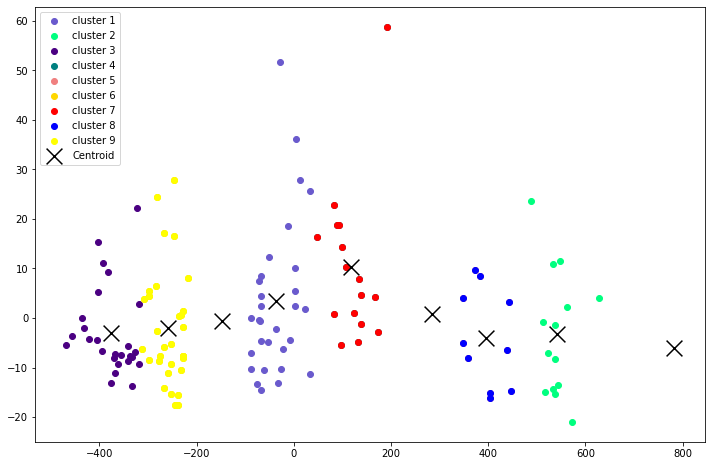

In [586]:
plt.figure(figsize=(12,8))


plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 0].loc[:, 'PC2'], color='slateblue',label="cluster 1")
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 1].loc[:, 'PC2'], color='springgreen',label="cluster 2")
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 2].loc[:, 'PC2'], color='indigo',label="cluster 3")
plt.scatter(reduced_X[reduced_X['Clusters'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 3].loc[:, 'PC2'], color='teal',label="cluster 4")
plt.scatter(reduced_X[reduced_X['Clusters'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 4].loc[:, 'PC2'], color='lightcoral',label="cluster 5")
plt.scatter(reduced_X[reduced_X['Clusters'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 5].loc[:, 'PC2'], color='gold',label="cluster 6")
plt.scatter(reduced_X[reduced_X['Clusters'] == 3].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 3].loc[:, 'PC2'], color='red',label="cluster 7")
plt.scatter(reduced_X[reduced_X['Clusters'] == 4].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 4].loc[:, 'PC2'], color='blue' ,label="cluster 8")
plt.scatter(reduced_X[reduced_X['Clusters'] == 5].loc[:, 'PC1'], reduced_X[reduced_X['Clusters'] == 5].loc[:, 'PC2'], color='yellow',label="cluster 9")



plt.scatter(reduced_centers[:,0],reduced_centers[:,1], color="black",marker="x",s = 250,label = "Centroid")

plt.legend(loc=2, prop={'size': 10})
plt.savefig('foo.png')
plt.show()

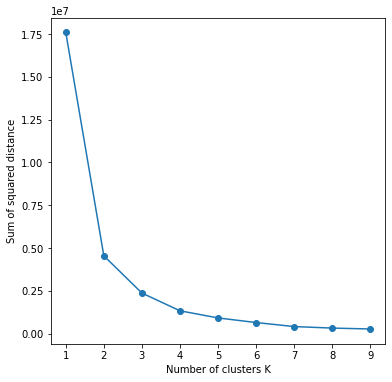

In [587]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(independent_variable)
           
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters K')
plt.ylabel('Sum of squared distance');
plt.savefig("sam.png")

In [588]:
target_variable

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Cultivars, Length: 178, dtype: int64

In [589]:
 boolean_list =list(clusters == target_variable)


In [590]:
true_count = sum(boolean_list)